In [7]:
import warnings

from itertools import product

from tqdm import tqdm

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, silhouette_score
from sklearn.neural_network import MLPClassifier

from src.datasets import (
    alldts, get_blobs,
    get_breast_cancer_wisconsin, get_breast_cancer_coimbra, get_german_credit
)

## Test

In [ ]:
data, target = get_breast_cancer_wisconsin()
# data, target = get_blobs(n_obs=512)
X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.1)

In [ ]:
model = MLPClassifier(
    hidden_layer_sizes=(int(2**13), ), activation="tanh", solver="adam",
    alpha=0, beta_1=0.9, beta_2=0.999,
    max_iter=100,
    verbose=True, shuffle=False,
    early_stopping=False, validation_fraction=0.1,
    n_iter_no_change=256, tol=1e-6,
    epsilon=1e-8, learning_rate="constant",
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
accuracy_score(y_pred=model.predict(X_train), y_true=y_train), accuracy_score(y_pred=model.predict(X_test), y_true=y_test)

In [ ]:
plt.plot(model.loss_curve_)
plt.yscale("log")
plt.grid(True, "both", alpha=.3)

In [ ]:
print(classification_report(y_pred=model.predict(X_train), y_true=y_train))

In [ ]:
print(classification_report(y_pred=model.predict(X_test), y_true=y_test))

## Execute for all datasets

In [ ]:
res = list()

for name, (data, target) in alldts().items():
    X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.1)

    model = MLPClassifier(
        hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="adam",
        alpha=0, beta_1=0.9, beta_2=0.999,
        max_iter=1024,
        verbose=False, shuffle=False,
        early_stopping=False, validation_fraction=0.1,
        n_iter_no_change=128, tol=1e-6,
        epsilon=1e-8, learning_rate="constant",
    )

    model.fit(X_train, y_train)

    res.append((
        name,
        accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
        accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
        model.best_loss_
    ))
    print(res[-1])

In [ ]:
for elem in res:
    print(elem)

```
('synth_linear', 0.9788388497015735, 0.9707317073170731, 0.052382419507525285)
('synth_blobs', 0.8562126966901791, 0.8634146341463415, 0.3211682111107963)
('synth_moons', 0.9739555073250136, 0.975609756097561, 0.07893427880505421)
('cred_aus', 1.0, 0.8115942028985508, 0.003973575106792552)
('cred_ger', 1.0, 0.73, 0.00016377633931161258)
('banknote', 1.0, 1.0, 9.819143678097311e-05)
('breast_coimbra', 1.0, 0.5833333333333334, 0.0016671655433862797)
('breast_wiscons', 0.998371335504886, 0.9855072463768116, 0.010349796410566922)
('haberman_surv', 0.7927272727272727, 0.7741935483870968, 0.4558088231894344)
('sonar', 1.0, 0.9047619047619048, 0.00025074506213388937)
('heart', 1.0, 0.7777777777777778, 0.0024350693271338307)
```

## Execute for specific datasets

### Coimbra

In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    res = list()

    for _ in tqdm(range(30)):
        data, target = get_breast_cancer_coimbra()
        X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.3)

        model = MLPClassifier(
            hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="adam",
            alpha=0, beta_1=0.9, beta_2=0.999,
            max_iter=2048,
            verbose=False, shuffle=False,
            early_stopping=False, validation_fraction=0.1,
            n_iter_no_change=128, tol=1e-6,
            epsilon=1e-8, learning_rate="constant",
        )

        model.fit(X_train, y_train)

        res.append((
            accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
            accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
            model.best_loss_
        ))

100%|██████████| 30/30 [02:36<00:00,  5.21s/it]


<AxesSubplot: ylabel='Frequency'>

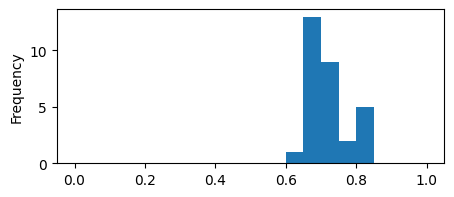

In [3]:
pd.DataFrame(res)[1].plot.hist(bins=np.linspace(0, 1, 21), figsize=(5, 2))

### German Credit

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    res = list()

    for _ in tqdm(range(30)):
        data, target = get_german_credit()
        X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.3)

        model = MLPClassifier(
            hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="adam",
            alpha=0, beta_1=0.9, beta_2=0.999,
            max_iter=2048,
            verbose=False, shuffle=False,
            early_stopping=False, validation_fraction=0.1,
            n_iter_no_change=128, tol=1e-6,
            epsilon=1e-8, learning_rate="constant",
        )

        model.fit(X_train, y_train)

        res.append((
            accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
            accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
            model.best_loss_
        ))

100%|██████████| 30/30 [13:57<00:00, 27.91s/it]


<AxesSubplot: ylabel='Frequency'>

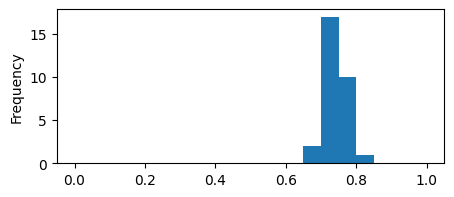

In [5]:
pd.DataFrame(res)[1].plot.hist(bins=np.linspace(0, 1, 21), figsize=(5, 2))

## Evaluate network weights

In [99]:
from matplotlib.cbook import silent_list


with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    res = list()

    for _, alpha in tqdm(list(product(range(30), np.logspace(-1, 1/2, num=20)))):
        data, target = get_breast_cancer_coimbra()
        X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.3)

        model = MLPClassifier(
            hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="adam",
            alpha=alpha, beta_1=0.9, beta_2=0.999,
            max_iter=1024,
            verbose=False, shuffle=False,
            early_stopping=False, validation_fraction=0.1,
            n_iter_no_change=512, tol=1e-6,
            epsilon=1e-8, learning_rate="constant",
        )

        model.fit(X_train, y_train)

        res.append({
            "alpha": alpha,
            "acc_train": accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
            "acc_test": accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
            "best_loss": model.best_loss_,
            "silhouette": silhouette_score(X=X_train @ model.coefs_[0], labels=y_train, metric="euclidean"),
            "iterations": model.n_iter_
        })

100%|██████████| 600/600 [31:19<00:00,  3.13s/it]


In [100]:
df_res = pd.DataFrame(res)

In [105]:
df_res_grouped = df_res.groupby("alpha", as_index=False).mean()
df_res_grouped

,alpha,acc_train,acc_test,best_loss,silhouette,iterations
0,0.100000,1.000000,0.731429,0.108818,0.022087,1024.000000
1,0.119935,1.000000,0.727619,0.126402,0.019216,1024.000000
2,0.143845,1.000000,0.738095,0.143450,0.020003,1024.000000
3,0.172521,1.000000,0.739048,0.158618,0.020733,1024.000000
4,0.206914,0.998765,0.745714,0.169256,0.029315,1024.000000
5,0.248163,0.995885,0.738095,0.192083,0.027581,1024.000000
6,0.297635,0.988889,0.758095,0.217271,0.026455,1024.000000
7,0.356970,0.983951,0.729524,0.225214,0.039324,1024.000000
8,0.428133,0.973251,0.736190,0.261899,0.041223,1024.000000
9,0.513483,0.954321,0.750476,0.293305,0.056318,1023.133333


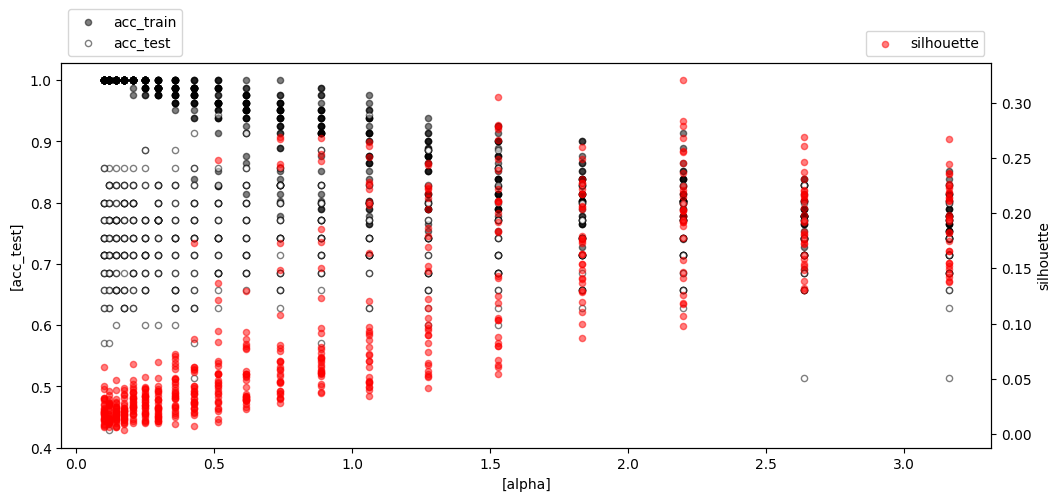

In [102]:
plt.figure(figsize=(12, 5))
ax = plt.gca()

(
    df_res
    [["alpha", "acc_train"]]
    .plot.scatter(
        x=["alpha"],
        y=["acc_train"],
        c="black", edgecolors="black", alpha=.5,
        ax=ax, label="acc_train",
    )
)

(
    df_res
    [["alpha", "acc_test"]]
    .plot.scatter(
        x=["alpha"],
        y=["acc_test"],
        c="white", edgecolors="black", alpha=.5,
        ax=ax, label="acc_test",
    )
)

axt = ax.twinx()

(
    df_res
    [["alpha", "silhouette"]]
    .plot.scatter(
        x="alpha",
        y="silhouette",
        c="red", alpha=.5,
        ax=axt, label="silhouette"
    )
)

ax.legend(bbox_to_anchor=(0, 1), loc="lower left")
axt.legend(bbox_to_anchor=(1, 1), loc="lower right")

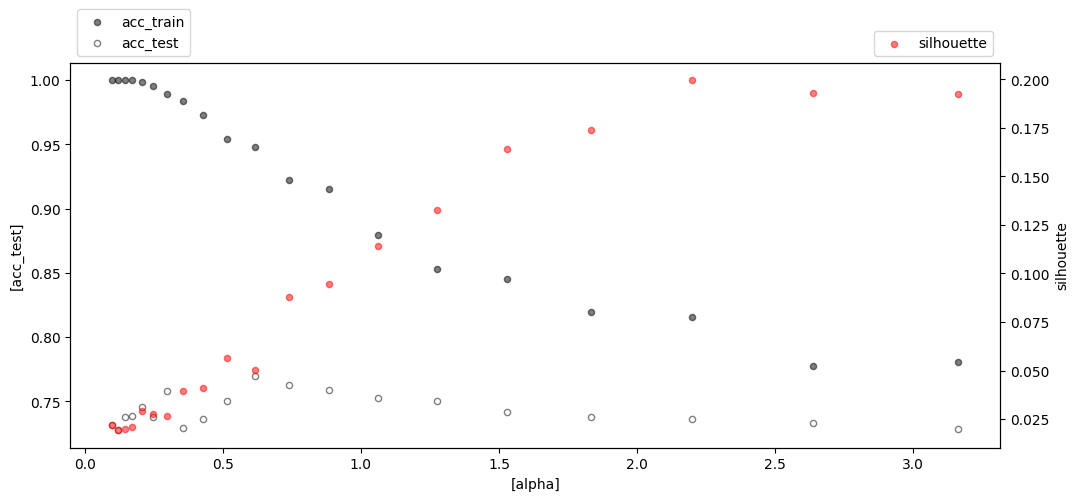

In [106]:
plt.figure(figsize=(12, 5))
ax = plt.gca()

(
    df_res_grouped
    [["alpha", "acc_train"]]
    .plot.scatter(
        x=["alpha"],
        y=["acc_train"],
        c="black", edgecolors="black", alpha=.5,
        ax=ax, label="acc_train",
    )
)

(
    df_res_grouped
    [["alpha", "acc_test"]]
    .plot.scatter(
        x=["alpha"],
        y=["acc_test"],
        c="white", edgecolors="black", alpha=.5,
        ax=ax, label="acc_test",
    )
)

axt = ax.twinx()

(
    df_res_grouped
    [["alpha", "silhouette"]]
    .plot.scatter(
        x="alpha",
        y="silhouette",
        c="red", alpha=.5,
        ax=axt, label="silhouette"
    )
)

ax.legend(bbox_to_anchor=(0, 1), loc="lower left")
axt.legend(bbox_to_anchor=(1, 1), loc="lower right")

---